# **Plot of angles in some reference systems: center-of-mass vs Gottfried-Jackson vs Adair**

Prepare the notebook with the preambles for the inclusion of pandas, numpy and matplotlib.pyplot.
Import the data file (csv format) into Google Colab through the drive.mount command, import the pylorentz package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Again we copy locally the data file using the gdown python package (alternative to mounting the data folder)

In [2]:
!pip install gdown
import gdown

In [3]:
# real experimental data
# gammap_5GeV_PiPlusPiMinusProtWHel_inclusive_gold2bG14.csv
url = 'https://drive.google.com/uc?id=1qiYjPbR5nx3_Sw7MXuUKhNAUpkXPoxYh'

output = 'gammapi_2pions_inclusive.dat'
gdown.download(url, output, quiet=False)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1qiYjPbR5nx3_Sw7MXuUKhNAUpkXPoxYh
To: /content/gammapi_2pions_inclusive.dat
100%|██████████| 95.6M/95.6M [00:00<00:00, 155MB/s]


In [4]:
data.head()
#data.columns = data.columns.str.strip()

,p1x,p1y,p1z,E1,p2x,p2y,p2z,E2,p3x,p3y,p3z,E3,pgamma,helGamma,
0,0.517085,0.161989,0.731173,0.920732,-0.254367,0.082889,0.495509,0.580189,-0.259266,-0.265152,0.445175,1.10275,1.65780,-1,
1,-0.216852,-0.245333,0.107538,0.371878,-0.183380,0.191897,0.145128,0.333213,0.389750,0.112110,0.790133,1.29195,1.04479,-1,
2,0.197931,0.071432,-0.010077,0.252778,-0.111780,-0.360482,0.367842,0.545221,-0.090228,0.302313,0.724911,1.22694,1.09547,-1,
3,-0.505371,-0.163949,0.450407,0.710395,-0.141057,0.282404,1.186530,1.235730,0.679497,-0.112014,0.729706,1.37371,2.38869,-1,
4,0.260706,-0.330303,0.385968,0.587839,0.163863,0.354007,0.286983,0.504031,-0.490385,-0.019313,0.879568,1.37653,1.45488,1,


In [5]:
! pip install pylorentz

In [6]:
import math
from pylorentz import Momentum4

Let's prepare the relevant arrays containing the 4-momenta kinematics of the three particle (plus the two in the intial state), both in the laboratory and in the center of mass reference systems:

In [7]:
data.columns = data.columns.str.strip()

In [8]:
# final state
p1T = np.sqrt(data.p1x**2+data.p1y**2)
p1mod = np.sqrt(p1T**2 + data.p1z**2)
eta1 = np.arcsinh(data.p1z/p1T)
phi1 = np.arctan2(data.p1y, data.p1x)
pionPlus = Momentum4.e_eta_phi_p(data.E1, eta1, phi1, p1mod)

p2T = np.sqrt(data.p2x**2+data.p2y**2)
p2mod = np.sqrt(p2T**2 + data.p2z**2)
eta2 = np.arcsinh(data.p2z/p2T)
phi2 = np.arctan2(data.p2y, data.p2x)
pionMinus = Momentum4.e_eta_phi_p(data.E2, eta2, phi2, p2mod)

p3T = np.sqrt(data.p3x**2+data.p3y**2)
p3mod = np.sqrt(p3T**2 + data.p3z**2)
eta3 = np.arcsinh(data.p3z/p3T)
phi3 = np.arctan2(data.p3y, data.p3x)
proton = Momentum4.e_eta_phi_p(data.E3, eta3, phi3, p3mod)

# initial state
# alen is the number of events read by the csv file
len = len(data.pgamma)
pgammaT = np.zeros(len)
pgammamod = data.pgamma
etagamma = 1.e11*np.ones(len)
phigamma = np.zeros(len)
massGamma = 0.
Egamma = np.sqrt(massGamma**2 + pgammamod**2)
gamma = Momentum4.e_eta_phi_p(Egamma, etagamma, phigamma, pgammamod)

# the target (proton) is at rest
massProton = 0.93827
ETgt = massProton*np.ones(len)
etaTgt = np.zeros(len)
phiTgt = np.zeros(len)
pTgt = np.zeros(len)
protonTarget =  Momentum4.e_eta_phi_p(ETgt, etaTgt, phiTgt, pTgt)

In [9]:
# 4-momenta in the scenter of mass system
centerOfMass = gamma + protonTarget

pionPlusCM = pionPlus.boost_particle(-centerOfMass)
pionMinusCM = pionMinus.boost_particle(-centerOfMass)
protonCM = proton.boost_particle(-centerOfMass)

k = gamma.boost_particle(-centerOfMass)
protonTargetCM = protonTarget.boost_particle(-centerOfMass)
q = pionPlusCM+pionMinusCM
kcmDipion = gamma.boost_particle(-q)

Let us suppose that the two pions form an intermediate state (that can be resonant or not), which we identify as "dipion" D.
Let's choose the axes directions in the center-of mass system as follows, being $\mathbf{k}$ the photon momentum and $\mathbf{q}$ the momentum of the dipion:


*   $\mathbf{Z} = \frac{\mathbf{k}}{|\mathbf{k}|}$
*   $\mathbf{Y} = \frac{\mathbf{k}\times \mathbf{q}}{|\mathbf{k}\times \mathbf{q}|}$
*   $\mathbf{X} = \frac{(\mathbf{k}\times \mathbf{q})\times \mathbf{k}}{(|\mathbf{k}\times \mathbf{q})\times \mathbf{k}|}$



### Angular distributions in helicity frame

Angles and particle directions can be visualised in different reference frames in which resonance properties can emerge more easily.
The decay distribution of the dipion may be discussed in the
 **helicity reference system**, defined as follows:


*   The $z$ direction is chosen opposite to the direction of the recoiling nucleon in the D rest system (i.e., it is equal to the direction of flight of the dipion in the overall c.m. system)
*   The $y$ direction is the normal to the production plane, defined by the cross product of the three-momenta of the dipion and the nucleon
* The $x$ direction follows as $\mathbf{x = y \times z}$.

The decay angles $\phi,\; \theta$ are defined as the polar and azimuthal angles of the unit vector $\mathbf n$. In the present case (of a two-particle decay), it indicates the direction of flight of one of the two decay particles; for a three-particle decay, $\mathbf n$ is the normal to the decay plane in the decaying particle rest frame.
The angles are defines as follows:




*   $\cos\theta = \mathbf{n\cdot z}$
*   $\cos\phi = \frac{\mathbf{y\cdot(z\times n)}}{|\mathbf{z\times n}|}$
*   $\sin\phi = -\frac{\mathbf{x\cdot(z\times n)}} {|\mathbf{z\times n}|}$











Let's choose the $\pi^+$'s direction as $\mathbf n$ and extract the angular distributions for the reaction under study:

In [10]:
n = []
z = []
y = []
x = []
zcrossn = []
cosTheta = []
cosPhi = []
sinPhi = []
phiHel = []
#len = len(data.p1x)
#for 5000 events: 50 s
len = 10000
for i in range(len):
  n = np.array([pionPlusCM.p_x[i], pionPlusCM.p_y[i], pionPlusCM.p_z[i]])
  n /= pionPlusCM.p[i]
  z = np.array([q.p_x[i], q.p_y[i], q.p_z[i]])
  z /= q.p[i]
  k3 = np.array([k.p_x[i], k.p_y[i], k.p_z[i]])
  q3 = np.array([q.p_x[i], q.p_y[i], q.p_z[i]])
  y = np.cross(k3,q3)
  y /= np.linalg.norm(y)
  x = np.cross(y,z)
  cosTheta.append(np.dot(n,z))
  zcrossn = np.cross(z,n)
  cosPhi.append(np.dot(y, zcrossn)/np.linalg.norm(zcrossn))
  sinPhi.append(-np.dot(x, zcrossn)/np.linalg.norm(zcrossn))
  # extraction of the phi angle
  # the angle spans the (-pi, +pi) range and its sign is taken correctly into account by the arctan2 function
  phiHel.append(np.arctan2(sinPhi[i],cosPhi[i]))

Let's plot the distributions for $\cos\theta$ and the azimuthal angle $\phi$ in the helicity frame.

Text(0, 0.5, 'Entries/(0.13 rad)')

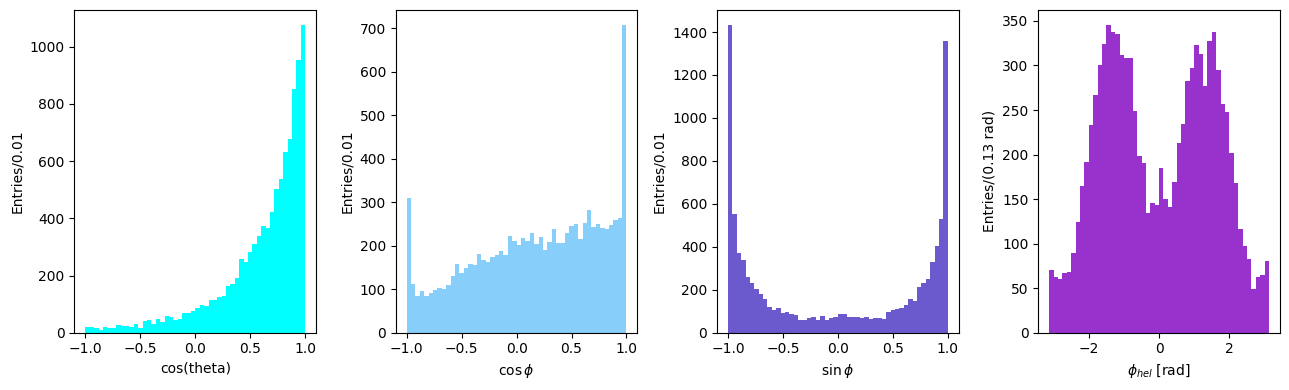

In [11]:
fig, ax = plt.subplots(1,4, tight_layout=True, figsize=(13,4))

ax[0].hist(cosTheta, bins=50, color='aqua')
ax[0].set_xlabel('cos(theta)')
ax[0].set_ylabel('Entries/0.01')
ax[1].hist(cosPhi, color='lightskyblue', bins=50)
ax[1].set_xlabel('$\cos\phi$')
ax[1].set_ylabel('Entries/0.01')
ax[2].hist(sinPhi, bins=50, color='slateblue')
ax[2].set_xlabel('$\sin\phi$')
ax[2].set_ylabel('Entries/0.01')
ax[3].hist(phiHel, bins=50, color='darkorchid')
ax[3].set_xlabel('$\phi_{hel}$ [rad]')
ax[3].set_ylabel('Entries/(0.13 rad)')

### Angular distributions in the Gottfried-Jackson frame

Differently from the helicity system, in the **Gottfried-Jackson** system the $z$ axis is equal to the direction of flight of the incoming photon in the D rest frame. Having replaced the $z$ axis, all other vectors definitions follow accordingly.

In [12]:
phiGJ = []
cosPhi = []
sinPhi = []
cosTheta = []

for i in range(len):
  n = np.array([pionPlusCM.p_x[i], pionPlusCM.p_y[i], pionPlusCM.p_z[i]])
  n /= pionPlusCM.p[i]
  z = np.array([kcmDipion.p_x[i], kcmDipion.p_y[i], kcmDipion.p_z[i]])
  z /= kcmDipion.p[i]
  k3 = np.array([k.p_x[i], k.p_y[i], k.p_z[i]])
  q3 = np.array([q.p_x[i], q.p_y[i], q.p_z[i]])
  y = np.cross(k3,q3)
  y /= np.linalg.norm(y)
  x = np.cross(y,z)
  cosTheta.append(np.dot(n,z))
  zcrossn = np.cross(z,n)
  cosPhi.append(np.dot(y, zcrossn)/np.linalg.norm(zcrossn))
  sinPhi.append(-np.dot(x, zcrossn)/np.linalg.norm(zcrossn))
  phiGJ.append(np.arctan2(sinPhi[i],cosPhi[i]))

Text(0, 0.5, 'Entries/(0.13 rad)')

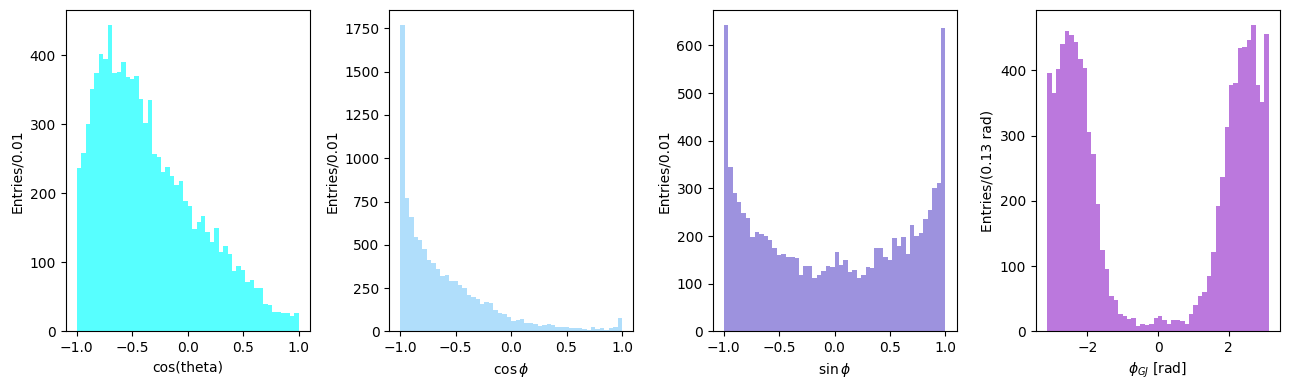

In [13]:
fig, ax = plt.subplots(1,4, tight_layout=True, figsize=(13,4))

ax[0].hist(cosTheta, bins=50, color='aqua', alpha=0.66)
ax[0].set_xlabel('cos(theta)')
ax[0].set_ylabel('Entries/0.01')
ax[1].hist(cosPhi, color='lightskyblue', bins=50, alpha=0.66)
ax[1].set_xlabel('$\cos\phi$')
ax[1].set_ylabel('Entries/0.01')
ax[2].hist(sinPhi, bins=50, color='slateblue', alpha=0.66)
ax[2].set_xlabel('$\sin\phi$')
ax[2].set_ylabel('Entries/0.01')
ax[3].hist(phiGJ, bins=50, color='darkorchid', alpha=0.66)
ax[3].set_xlabel('$\phi_{GJ}$ [rad]')
ax[3].set_ylabel('Entries/(0.13 rad)')

### Angular distributions in the Adair frame

On the other hand, in the **Adair** system the $z$ is equal to the direction of flight of the incoming photon in the c.m. system of the reaction. All other definition follow, as above.

In [14]:
phiAdair = []
cosPhi = []
sinPhi = []
cosTheta = []

for i in range(len):
  n = np.array([pionPlusCM.p_x[i], pionPlusCM.p_y[i], pionPlusCM.p_z[i]])
  n /= pionPlusCM.p[i]
  z = np.array([k.p_x[i], k.p_y[i], k.p_z[i]])
  z /= k.p[i]
  k3 = np.array([k.p_x[i], k.p_y[i], k.p_z[i]])
  q3 = np.array([q.p_x[i], q.p_y[i], q.p_z[i]])
  y = np.cross(k3,q3)
  y /= np.linalg.norm(y)
  x = np.cross(y,z)
  cosTheta.append(np.dot(n,z))
  zcrossn = np.cross(z,n)
  cosPhi.append(np.dot(y, zcrossn)/np.linalg.norm(zcrossn))
  sinPhi.append(-np.dot(x, zcrossn)/np.linalg.norm(zcrossn))
  phiAdair.append(np.arctan2(sinPhi[i],cosPhi[i]))

Text(0, 0.5, 'Entries/(0.13 rad)')

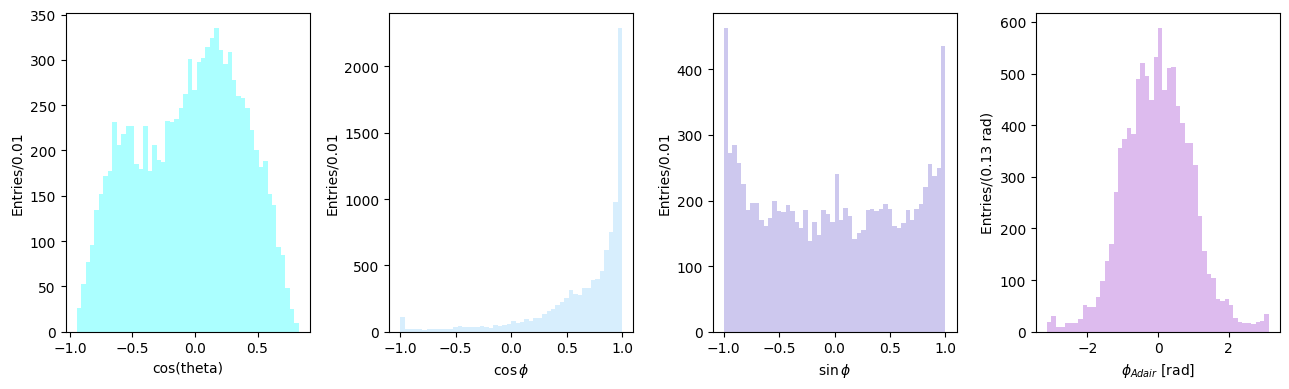

In [15]:
fig, ax = plt.subplots(1,4, tight_layout=True, figsize=(13,4))

ax[0].hist(cosTheta, bins=50, color='aqua', alpha=0.33)
ax[0].set_xlabel('cos(theta)')
ax[0].set_ylabel('Entries/0.01')
ax[1].hist(cosPhi, color='lightskyblue', bins=50, alpha=0.33)
ax[1].set_xlabel('$\cos\phi$')
ax[1].set_ylabel('Entries/0.01')
ax[2].hist(sinPhi, bins=50, color='slateblue', alpha=0.33)
ax[2].set_xlabel('$\sin\phi$')
ax[2].set_ylabel('Entries/0.01')
ax[3].hist(phiAdair, bins=50, color='darkorchid', alpha=0.33)
ax[3].set_xlabel('$\phi_{Adair}$ [rad]')
ax[3].set_ylabel('Entries/(0.13 rad)')